Данный файл предназначен для статистического анализа данных

Вход:
- Calculation_Descriptors

Выход:

- data_analysis_d

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import metrics

In [5]:
#Датасет только с дескрипторами
df=pd.read_csv('/content/drive/MyDrive/Datacon/Calculation_Descriptors.csv')

In [3]:
# @title Смотрим на квартили и квантили
def distribution(dt, col):
  #dt.drop(columns=['batch', 'patient'], inplace=True)
  x = str(col)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 8), sharex=False, sharey=False)
  fig.suptitle(x, fontsize=20)

  ax[0].title.set_text('distribution')
  variable = dt[x].fillna(dt[x].mean())
  sns.histplot(variable, kde=True, element='step', fill=True, alpha=.5, ax=ax[0])
  des = dt[x].describe()
  ax[0].axvline(des["25%"], ls='--')
  ax[0].axvline(des["mean"], ls='--')
  ax[0].axvline(des["75%"], ls='--')
  ax[0].grid(True)
  des = round(des, 2).apply(lambda x: str(x))
  box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"], "std: "+des["std"]))
  ax[0].text(0.25, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

  ax[1].title.set_text('outliers')
  tmp_dtf = pd.DataFrame(dt[x])
  tmp_dtf.boxplot(column=x, ax=ax[1])
  plt.show()

In [4]:
def get_quantile_range_df(df, column_names):
    lower_quantiles = df[column_names].quantile(0.05)
    upper_quantiles = df[column_names].quantile(0.95)
    result = df
    for column in column_names:
        result = result[(result[column] >= lower_quantiles[column]) & (result[column] <= upper_quantiles[column])]
    return result

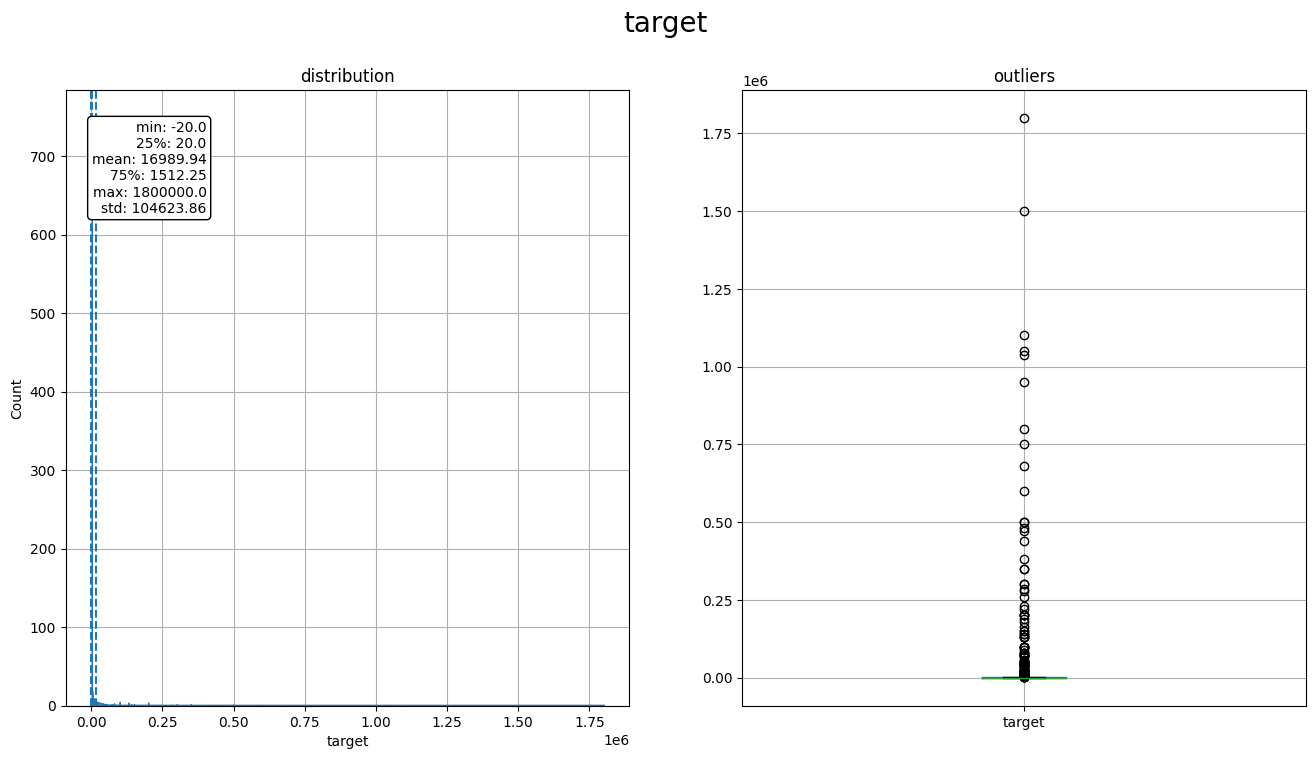

In [6]:
distribution(df, 'target')

In [7]:
#По результатам графиков было решено обрезать 5% и 95% части от выборки, чтобы сбалансировать ее
df = get_quantile_range_df(df, ['target'])
df.reset_index(drop= True , inplace= True )

In [8]:
df

,Unnamed: 0.1,Unnamed: 0,Uptake,Units,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,0,0,650.00,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,0.250000,12.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,1,1,31.25,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,0.166667,12.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,2,2,10.00,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,RKKRRQR,0.166667,12.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,3,3,22.50,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,0.166667,12.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,4,4,20.00,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,KRRQRRR,0.166667,12.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,1279,1279,50.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RHRHRHRHR,24.000000,50000.0,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,1280,1280,100.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR,24.000000,50000.0,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,1281,1281,250.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR,24.000000,50000.0,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,1282,1282,400.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR,24.000000,50000.0,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


In [9]:
df=df.drop(columns=['Unnamed: 0.1',	'Unnamed: 0'])
df

,Uptake,Units,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",target,_PolarizabilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,650.00,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,0.250000,12.5,650.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,31.25,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,0.166667,12.5,31.25,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,10.00,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,RKKRRQR,0.166667,12.5,10.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,22.50,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,0.166667,12.5,22.50,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,20.00,Mean Fluorescence intensity,23.0,Flow cytometry,Cellular uptake,KRRQRRR,0.166667,12.5,20.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,50.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RHRHRHRHR,24.000000,50000.0,50.00,0.0,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,100.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR,24.000000,50000.0,100.00,0.0,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,250.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR,24.000000,50000.0,250.00,0.0,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,400.00,Mean Fluorescence intensity,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR,24.000000,50000.0,400.00,0.0,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


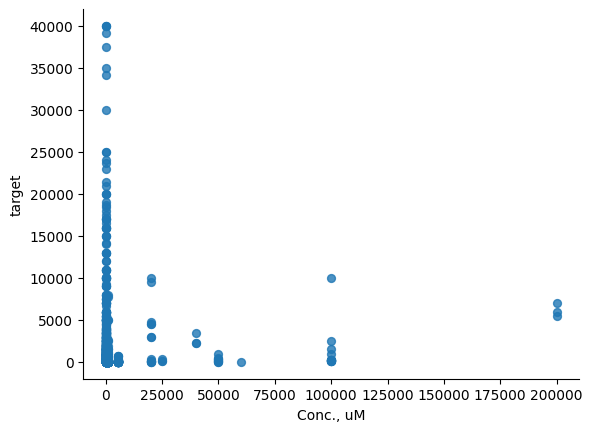

In [20]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Conc., uM', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
#Подготавливаем текстовые данные, кодируя их классами
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
Method = LabelEncoder()
Type = LabelEncoder()

# Кодирование колонок
df['Method'] = Method.fit_transform(df['Method'])
df['Type'] = Type.fit_transform(df['Type'])
df

,Uptake,Units,Temp.,Method,Type,Sequence,"Time, h","Conc., uM",target,_PolarizabilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,650.00,Mean Fluorescence intensity,23.0,1,5,RKKRRQRRR,0.250000,12.5,650.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,31.25,Mean Fluorescence intensity,23.0,1,5,RKKRRQRR,0.166667,12.5,31.25,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,10.00,Mean Fluorescence intensity,23.0,1,5,RKKRRQR,0.166667,12.5,10.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,22.50,Mean Fluorescence intensity,23.0,1,5,KKRRQRRR,0.166667,12.5,22.50,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,20.00,Mean Fluorescence intensity,23.0,1,5,KRRQRRR,0.166667,12.5,20.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,50.00,Mean Fluorescence intensity,37.0,1,4,RHRHRHRHR,24.000000,50000.0,50.00,0.0,...,22.222,22.222,44.444,66.667,88.889,0.0,0.0,0.0,0.0,0.0
1162,100.00,Mean Fluorescence intensity,37.0,1,4,RRHRHRHRHR,24.000000,50000.0,100.00,0.0,...,30.000,30.000,50.000,70.000,90.000,0.0,0.0,0.0,0.0,0.0
1163,250.00,Mean Fluorescence intensity,37.0,1,4,RRRHRHRHRHR,24.000000,50000.0,250.00,0.0,...,36.364,36.364,54.545,72.727,90.909,0.0,0.0,0.0,0.0,0.0
1164,400.00,Mean Fluorescence intensity,37.0,1,4,RRRRHRHRHRHR,24.000000,50000.0,400.00,0.0,...,41.667,41.667,58.333,75.000,91.667,0.0,0.0,0.0,0.0,0.0


In [11]:
df_corr=df.drop(columns=['Units', 'Sequence'])

<Axes: >

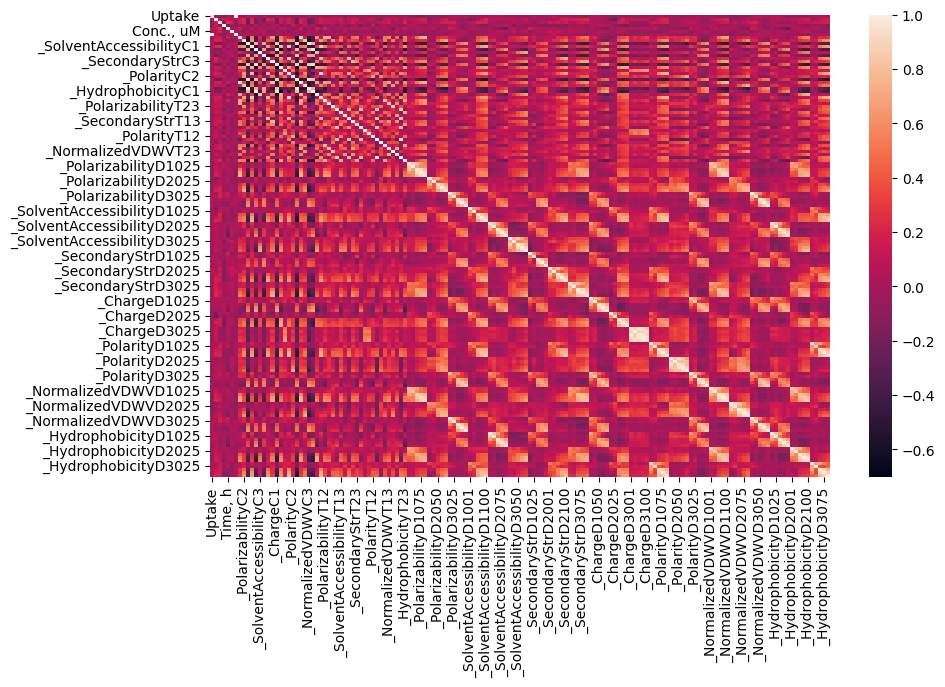

In [12]:
#Мы смотрели на корреляционную сетку, но после удаления некоторых коррелирующих друг с другом параметров,
#модель показывала метрики хуже, чем до удаления дескрипторов, поэтому было принято решение оставить все дескрипторы
data_corr=df_corr.corr()
plt.figure(figsize = (10,6))
sns.heatmap(data_corr)

In [ ]:
#Для лучшей наглядности отберем наиболее коррелирующие с таргетной величиной столбцы и сделаем тепловую карту для них
correlation_threshold = 0.05  # Например, 0.7

# Вычислите корреляцию между целевым столбцом и другими столбцами
correlations = df.select_dtypes(include=['number']).corr()['target']

# Отберите столбцы с корреляцией выше порогового значения
selected_columns = correlations[abs(correlations) > correlation_threshold].index

# Вывод результата
print(f"Столбцы с корреляцией больше {correlation_threshold} с '{'target'}':")
print(selected_columns)

<Axes: >

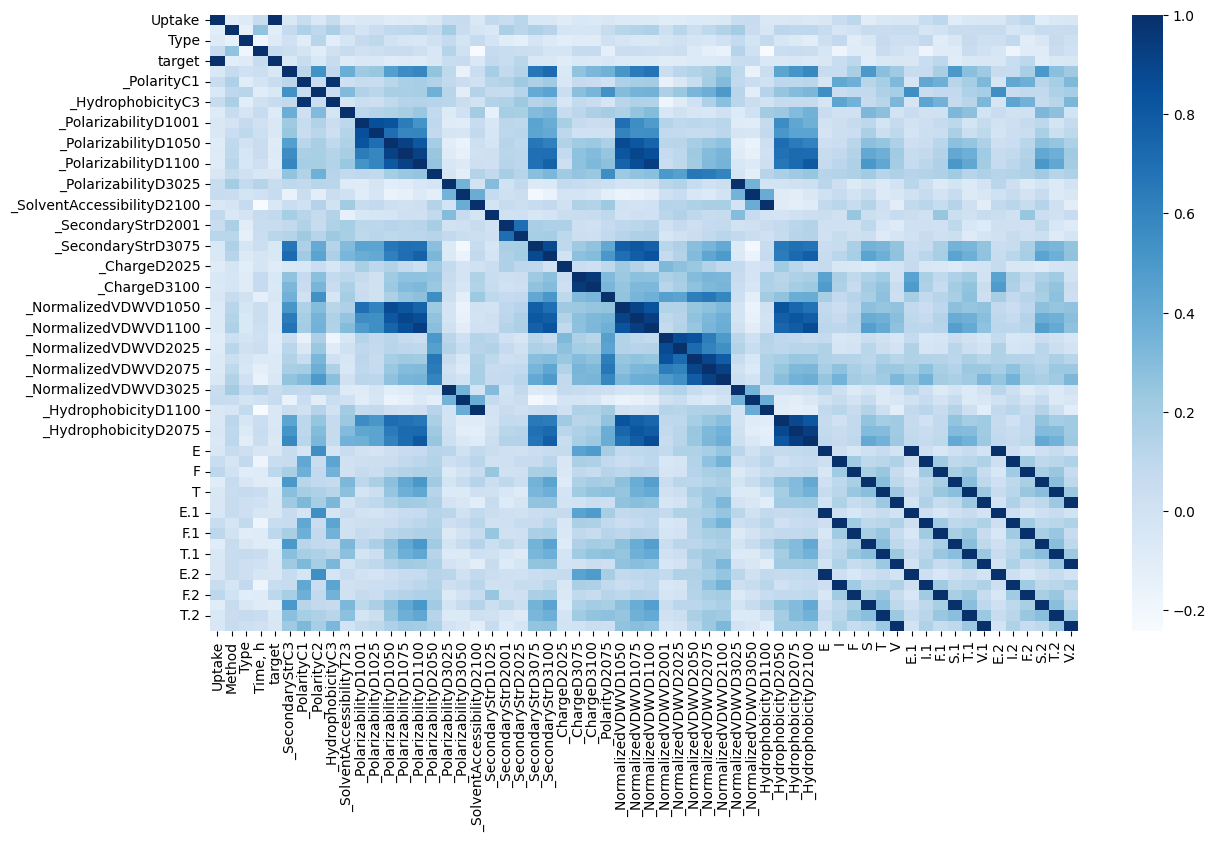

In [32]:
plt.figure(figsize=(14,8))
cmap = sns.color_palette("Blues", as_cmap=True)
#sns.heatmap(df_1[selected_columns], annot=True, cmap=cmap)
sns.heatmap(df_[selected_columns].select_dtypes(include=['number']).corr(), cmap=cmap)

In [24]:
df.to_csv('/content/drive/MyDrive/Datacon/data_analysis_d.csv')